![title](images/menu_sentimentos.png)

# Análises de sentimentos dos tweets

Este etapa aborda o processo de **análise de sentimentos** dos *tweets* selecionados na base de dados.

Foram experimentadas duas ferramentas neste processo, o **VADER (Valence Aware Dictionary and sEntiment Reasoner)**, modelo baseado em regras, especialmente refinado para a análise de sentimentos expressos em redes sociais (1) e o **SenticNet**, ferramenta que explora técnicas de Inteligência Artificial e Web Semântica (2). Estas ferramentas serão abordadas mais detalhadamente a seguir.

Ambas retornam um *score* de sentimento para frases/palavras submetidas à analise que variam de **-1 (extremamente negativo) a 1 (extremamente positivo)**, além de outros resultados. Neste trabalho, os *tweets* selecionados na etapa passada são submetidos à análise pelas ferramentas citadas.

Neste *notebook* abordaremos o processo de análise de sentimentos e os resultados obtidos com a utilização do VADER e do SenticNet. Por fim, **com base nesses resultados, foi escolhido um deles para ser utilizado na análise de resultados deste trabalho**.

**Importações**

In [1]:
#from googletrans import Translator
from google_trans_new import google_translator

import sys
import pandas as pd
import time

**Conexão ao banco de dados**

In [2]:
# Criando estrutura do banco de dados
from pymongo import MongoClient

# Conexão com o servidor do MongoDB
client = MongoClient('localhost', 27017)

# Conexão com a base de dados do mongoDB
db = client.SpedDB

# Coleção onde serão inseridos os dados
#collection = db.tweets_brasil_test2
collection = db.tweets_brasil

## Analisadores de sentimentos

### VADER

O **VADER** é um **modelo simples para análise de sentimentos baseados em regras, desenvolvido especialmente para o contexto de redes sociais**, sem requerer treinamento.

Tendo como foco a análise de textos de redes sociais, este modelo, por exemplo, é capaz de avaliar padrões como excesso de pontuações, utilização de letras maiúsculas e conjunções que podem inverter a polaridade do sentimento da mensagem (4).

Em seu artigo de apresentação, o VADER foi comparado com 11 analisadores de sentimentos altamente recomendáveis (como LIWC, ANEW, SentiWordNet e outros), incluindo analisadores baseados em *machine learning* (com a utilização dos algoritmos Naive Bayes, Maximum Entropy e Support Vector Machine(SVM). Em relação a estes analisadores, o VADER obteve uma performance comparável e, em muitos casos, até melhor (3).

A seguir, ilustramos a submissão de um **texto** à análise de sentimentos pelo VADER.

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

text = "It was a good movie!"
vs = analyzer.polarity_scores(text)
print(vs)

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4926}


A chamada ao VADER realizada no item anterior nos retorna os *scores* em quatro categorias:

- **Negative**
- **Neutral**
- **Positive**
- **Compound** (normalização dos *scores* computados acima)

O *compound* foi utilizado como resultado das análises de textos analisados neste trabalho.

A seguir, ilustramos outro exemplo de utilização do VADER, com a mesma frase, pouco modificada.

In [4]:
text = "It was a good movie!!!!!"
vs = analyzer.polarity_scores(text)
print(vs)

{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.6209}


Notamos, no exemplo anterior, que a **repetição da pontuação de exclamação** alterou **positivamente** os resultados retornados pelo VADER.

A seguir é exibido outro exemplo:

In [5]:
text = "It was a good movie :)"
vs = analyzer.polarity_scores(text)
print(vs)

{'neg': 0.0, 'neu': 0.404, 'pos': 0.596, 'compound': 0.7096}


A frase dessa vez, teve as exclamações trocadas pelos **caracteres ":)"**, que simbolizam um rosto feliz. Os resultados foram alterados **positivamente**.

Por fim, é mostrado um exemplo frase que expressa desaprovação:

In [6]:
text = "It was a TERRIBLE movie!!!"
vs = analyzer.polarity_scores(text)
print(vs)

{'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'compound': -0.6917}


A frase contém uma **palavra de sentido negativo escrita em maiúsculas** (que na linguagem informal das redes sociais simbiliza grito, raiva) e é finalizada com **seguidas exclamações**, tendo resultados negativos retornados pelo VADER.

### SenticNet

O **SenticNet** é um **analisador de sentimento que detecta polaridades e reconhece emoções, utilizando-se de informações denotativas e conotativas associadas a palavras e expressões** ao invés de depender simplesmente da frequência de ocorrẽncia de palavras.

A base de conhecimento do SenticNet, disponibilizada em diversas línguas, fornece um conjunto de 200.000 conceitos de linguagem natural, com definições **semânticas, *sentics* e polaridades associadas**.

As **semânticas definem informações denotativas** associadas a palavras e expressões, os ***sentics* definem informações conotativas** (valores de categorização de emoções em quatro dimensões afetivas) e as **polaridades retornam um número de -1 (extremamente positiva) e 1 (extremamente negativa)**, tal como o VADER, visto anteriormente.

O SenticNet pode ser associado ao termo **Sentic Computing**, paradigma multidisciplinar que foca em uma **representação semântica de conceitos de linguagem natural e estrutura da frase**, indo além da ideia de abordagens estatísticas para a análise de sentimento (3).

Neste trabalho, foi utilizada a **base de conhecimento em inglês**, pois, nos testes realizados, esta base retornou mais resultados do que a base em língua portuguesa.

A seguir, ilustramos a submissão de uma **palavra com sentimento positivo** à análise de sentimentos pelo SenticNet(4).

In [7]:
from senticnet.senticnet import SenticNet

sn = SenticNet()
text = 'love'
concept_info = sn.concept(text)
print(concept_info)

{'polarity_value': 'positive', 'polarity_intense': '0.83', 'moodtags': ['#joy', '#admiration'], 'sentics': {'pleasantness': '1', 'attention': '0', 'sensitivity': '0', 'aptitude': '0.66'}, 'semantics': ['tenderness', 'affection', 'kindness', 'care', 'passion']}


Podemos detalhar os resultados acima retornados pelo SenticNet da seguinte forma:

- **polarity_value**: Resultado da polaridade (positiva ou negativa);
- **polarity_intense**: Resultado consolidado da polaridade (tomando como base todos os outros resultados denotativos e conotativos);
- **mood_tags**: *Tags* associadas à palavra; 
- **sentics**: Sentimentos denotativos (agradabilidade, atenção, sensibilidade, aptidão);
- **semantics**: Significados semânticos para a palavra (No exemplo: ternura, afeto, bondade, cuidado, paixão).

Segue abaixo um exemplo da utilização do SenticNet para uma **palavra com sentimento negativo**:

In [8]:
from senticnet.senticnet import SenticNet

sn = SenticNet()
text = 'hate'
concept_info = sn.concept(text)
print(concept_info)

{'polarity_value': 'negative', 'polarity_intense': '-0.83', 'moodtags': ['#anger', '#disgust'], 'sentics': {'pleasantness': '-0.71', 'attention': '0', 'sensitivity': '0.83', 'aptitude': '-0.96'}, 'semantics': ['angry', 'mad', 'hatred', 'anger', 'resentment']}


Para a realização do cálculo de sentimentos dos *tweets* deste trabalho utilizando o SenticNet, foram calculadas *scores* de sentimentos em palavras válidas presentes no texto. Este procedimento será detalhado mais adiante.

## Pré-processamento

**Recuperação de tweets a serem analisados**

Na célula a seguir são recuperados os *tweets* aptos ao procedimento de análise de sentimentos. Estes registros são **resultados do procedimento de seleção, realizado na etapa anterior**.

In [3]:
# Recuperando tweets selecionados da base
tweets = collection.find({'translated_text':{'$eq':None},'lang': 'pt', 'geo_source':{'$ne':'tweet_text'}}, {'tweet_id':1,'text':1,'hash_text':1, 'translated_text':1, '_id': 0})

**Calculando hash para todos os textos**

In [4]:
# Função para tradução de textos utilizando a ferramenta Googletrans
def calc_hash(tweets):
    
    for tweet in tweets:
        
        hash_text = hash(tweet['text'])        
        collection.update_one({"tweet_id": tweet['tweet_id']}, {'$set':{'hash_text': hash_text}}) 

In [4]:
tweets = list(tweets)

In [5]:
len(tweets)

527266

In [7]:
calc_hash(tweets)

In [ ]:
collection.create_index('hash_text')

**Tradução dos tweets selecionados**

In [6]:
def return_tweet_translated(hash_text): 
    tweet = collection.find_one({'hash_text':hash_text, 'translated_text':{'$ne':None}}, {'translated_text':1, '_id': 0}) 
    return tweet

In [7]:
# Função para tradução de textos utilizando a ferramenta Googletrans
def translate_tweets_texts(tweets):
    
    start = 0
    
    # Tempo mínimo necessário entre uma chamada e outra da API de tradução (para evitar bloqueio do IP)
    min_time = 3
    
    for tweet in tweets:
        
        try:
            translated = '' 

            # Verificando se o texto já não foi traduzido anteriormente
            tweet_returned = return_tweet_translated(tweet['hash_text'])

            if (tweet_returned != None):           
                translated = tweet_returned['translated_text']      
            else:  
                
                #translator = Translator()
                #translated = translator.translate(text, dest='en').text   

                end = time.time()
                total_time = end - start

                if (total_time < min_time):
                    sleep_time = min_time - total_time  
                    time.sleep(sleep_time)

                translator = google_translator() 

                # Início da contagem do tempo de chamada à API de tradução
                start = time.time()  

                translated = translator.translate(tweet['text'], lang_tgt='en')

            collection.update_one({"tweet_id": tweet['tweet_id']}, {'$set':{'translated_text': translated}}) 
        
        except:
            print("Erro no processamento do tweet", tweet['tweet_id']) 

In [ ]:
translate_tweets_texts(tweets)

Erro no processamento do tweet 1248455872084205570


## Processamento das análises de sentimentos

### Processamento das análises de sentimentos utilizando o VADER

A função abaixo submete **o texto** do *tweet* à análise de sentimentos pelo VADER. É necessária a **tradução prévia do texto para o inglês**, tarefa realizada pela ferramenta **Googletrans** (3).

A implementação abaixo percorre a lista de registros retornada pelo banco de dados, efetua a tradução do texto, submete este dado ao VADER e atualiza o registro com o *score* de sentimento resultante.

In [55]:
# Função para o cálculo do score de sentimento de um texto utilizando a ferramenta VaderSentiment.
def calculate_vader_scores(tweets):
    
    for tweet in tweets:
        
        # Efetuando o cálculo do score de sentimento para o texto traduzido
        analyzer = SentimentIntensityAnalyzer()
        vs = analyzer.polarity_scores(tweet['translated_text'])
        
        # Recuperando o score e adicionando em uma nova célula do dataframe
        collection.update_one({"tweet_id": tweet['tweet_id']}, {'$set':{"score": vs['compound']}}) 

In [44]:
len(tweets)

97

In [45]:
calculate_vader_scores(tweets)

### Processamento das análises de sentimentos utilizando o SenticNet

**Funções para processamento e limpeza de textos**

As funções seguintes são utilizadas em procedimentos de **processamento** (como tokenização) e **limpeza de palavras** de textos dos *tweets* (como remoção de *stopwords*, remoção de *urls*, caracteres indesejados e outros).

Estas funções foram utilizadas para o processamento da análise de sentimentos realizada pelo **SenticNet**, que **diferentemente do VADER que analisa todo o texto, realiza a análise por palavra ou expressão**. Portanto, havia a necessidade de se submeter apenas palavras "válidas" à análise por esta ferramenta.

In [59]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [60]:
def process_tweet(text):

    tokens = []
     
    spacy_res = nlp(text.lower())
    for res in spacy_res:
        if (res.is_stop == False and res.pos_ not in ['PUNCT'] and 'http' not in res.text):
            if (res.pos_ == 'VERB'):
                tokens.append(res.lemma_)
            else: 
                tokens.append(res.text)                  
    return tokens

A função abaixo submete **as palavras contidas no texto** do *tweet* à análise de sentimentos pelo SenticNet. Antes dessa submissão, é necessário que se realize procedimentos no texto do tweet como: **tokenização do texto, limpeza de *urls*, remoção de *stopwords*, remoção de caracteres inválidos**. Estes procedimentos são necessários para que possamos submeter ao SenticNet somente **palavras válidas**.

Observa-se que com a utilização do SenticNet, pelas suas características, **perde-se a capacidade de analisar pontuações ou caracteres comumente utilizados nas redes sociais**, diferente do ocorrido com a utilização do VADER.

Adotamos como regra, com a finalidade de **diminuir a probabilidade de resultados incorretos no cálculo final dos sentimentos das frases**, que somente seriam considerados para a análise, **textos que possuíssem no mínimo metade de palavras com resultados retornados pelo SenticNet** (a ferramenta somente retorna resultados para palavras que constem em sua base de conhecimento).

In [61]:
# Funções para o cálculo da intensidade da polaridade de um texto utilizando a ferramenta SenticNet.
def calculate_senticnet_scores(tweets):
        
    for tweet in tweets:        
        try:  
            # Realizando a limpeza da frase
            words = process_tweet(tweet['translated_text'])

            # Efetuando o cálculo do score de sentimento para o texto
            polarity = calculate_senticnet_words_scores(words)

            # Recuperando o score e adicionando em uma nova célula do dataframe
            collection.update_one({"tweet_id": tweet['tweet_id']},{'$set':{"polarity": polarity}})  
        
        except Exception as e:
            print(e)
            e = sys.exc_info()[1]
            print ("Unexpected error:", e)
              

In [62]:
# Função para realizar o cálculo de polaridades do SenticNet

# Foram considerados para o cálculo somente textos em que no mínimo 50% das palavras tenham tido polaridade 
# retornada pela base de conhecimento do SenticNet em inglês).
def calculate_senticnet_words_scores(words):
        
    if(len(words) > 0):
        min_words_count = len(words)/2
        found_words = 0
        total_polarity_value = 0
        language_code = 'en'

        for word in words:
            word = word.lower()
            try:
                sn = SenticNet('en')
                polarity_str = sn.polarity_intense(word)
                polarity_value = float(polarity_str)      
                total_polarity_value = total_polarity_value + polarity_value
                found_words = found_words + 1
            except KeyError:
                e = sys.exc_info()[1]
                print ("Word not found:", e)

        # O cálculo será considerado somente se ao menos metade das palavras forem encontradas na base de conhecimento do SenticNet
        if found_words < min_words_count:
            return None
        else:
            polarity = total_polarity_value / found_words
            return polarity
    else:
        return None

In [63]:
calculate_senticnet_scores(tweets)

Word not found: '🥰'
Word not found: '🏻'
Word not found: '🏫'
Word not found: '📗'
Word not found: '📒'
Word not found: '📚'
Word not found: '👧'
Word not found: 'coronavirus'
Word not found: '#'
Word not found: 'cuvid19'
Word not found: '#'
Word not found: 'coronavirus'
Word not found: '#'
Word not found: '#'
Word not found: 'johnlennon'
Word not found: 'são'
Word not found: 'bernardo'
Word not found: 'campo'
Word not found: 'brazil'
Word not found: '@imprensacubatao'
Word not found: 'measures'
Word not found: 'covid-19'
Word not found: '/'
Word not found: 'cubataonoticias'
Word not found: 'italian'
Word not found: 'universities'
Word not found: 'd'
Word not found: 'effects'
Word not found: '//t.co'
Word not found: '/'
Word not found: 'pqvlxs3gq1'
Word not found: '\n'
Word not found: '\n'
Word not found: '🏍'
Word not found: '🛵'
Word not found: '🏍'
Word not found: '🛵'
Word not found: '🏍'
Word not found: '🛵'
Word not found: '🏍'
Word not found: '🛵'
Word not found: '\n'
Word not found: 'covid-1

Word not found: 'rolet'
Word not found: 'flamengo'
Word not found: 'kkkk'
Word not found: 'sailings'
Word not found: 'burials'
Word not found: 'covid-19'
Word not found: 'announces'
Word not found: 'measures'
Word not found: 'votes'
Word not found: 'burials'
Word not found: 'victims'
Word not found: '//'
Word not found: 't'
Word not found: '.co'
Word not found: '/'
Word not found: 'want'
Word not found: 'cuteness'
Word not found: '❤'
Word not found: '❤'
Word not found: '❤'
Word not found: 'cololavíux'
Word not found: '🤣'
Word not found: '🤣'
Word not found: '🤣'
Word not found: '#'
Word not found: 'coronavirus'
Word not found: '#'
Word not found: 'covid19'
Word not found: 'covovidbrasil'
Word not found: 'brazil'
Word not found: 'bananinhas'
Word not found: '😷'
Word not found: '#'
Word not found: 'floripa'
Word not found: 'tv'
Word not found: 'dogs'
Word not found: '🐶'
Word not found: '#'
Word not found: 'quarantena'
Word not found: '#'
Word not found: '#'
Word not found: 'picoftheday'
Wo

Word not found: '_'
Word not found: 'agenção'
Word not found: '_'
Word not found: 'steps'
Word not found: 'customers'
Word not found: 'friends'
Word not found: 'catanja'
Word not found: 'crafts'
Word not found: 'containment'
Word not found: 'measures'
Word not found: 'covid-19'
Word not found: 'caps'
Word not found: 'masks'
Word not found: 'cuvid-19'
Word not found: 'ma'
Word not found: 'cases'
Word not found: '791'
Word not found: 'suspects'
Word not found: '222'
Word not found: '31'
Word not found: '1'
Word not found: 'se'
Word not found: '30'
Word not found: '/03/2020'
Word not found: '\n'
Word not found: '#'
Word not found: 'covid'
Word not found: '#'
Word not found: '#'
Word not found: 'maranhão'
Word not found: '#'
Word not found: 'maranhao'
Word not found: '#'
Word not found: 'saoluismaranhao'
Word not found: '#'
Word not found: 'fiqueemcasa'
Word not found: '_'
Word not found: 'agenção'
Word not found: '_'
Word not found: 'steps'
Word not found: 'customers'
Word not found: 'fri

Word not found: '☀'
Word not found: '️'
Word not found: '🌊'
Word not found: '👁'
Word not found: 'donmanbrasil'
Word not found: '#'
Word not found: 'stayhome'
Word not found: '#'
Word not found: 'seguro'
Word not found: '#'
Word not found: 'feemcasa'
Word not found: '#'
Word not found: 'lockdown'
Word not found: '#'
Word not found: 'loche'
Word not found: '#'
Word not found: 'jajapassa'
Word not found: '#'
Word not found: 'nofimdomdo'
Word not found: '#'
Word not found: 'nordestino'
Word not found: '#'
Word not found: 'publi'
Word not found: '#'
Word not found: '#'
Word not found: 'instaman'
Word not found: '#'
Word not found: 'masculino'
Word not found: '#'
Word not found: 'instalife'
Word not found: '#'
Word not found: 'instapubli'
Word not found: 'fortaleza'
Word not found: 'brazil'
Word not found: '🚺'
Word not found: '💜'
Word not found: '•'
Word not found: '#'
Word not found: 'tuesdaythoughts'
Word not found: 'ulbra'
Word not found: 'governors'
Word not found: 'payments'
Word not fo

## Problemas comuns ao processo de análise de sentimentos

**Caso 1**: Sentimento negativo retornado para frase com sentido positivo

A imagem a seguir ilustra um *tweet* contendo uma notícia positiva acerta de descobertas ao combate do novo coronavírus. Possivelmente, a palavra "isolado", *isolate* na tradução para o inglês, influenciou o resultado negativo para o sentimento da frase.

![title](images/tweet1.png)

In [64]:
res = collection.find_one({'tweet_id': 1223984594057408512}, {'tweet_id':1,'state':1,'city':1,'text':1,'geo_source':1,'score':1,'polarity':1,'created_at':1,'_id':0})
res

{'tweet_id': 1223984594057408512,
 'created_at': datetime.datetime(2020, 2, 2, 15, 0, 42),
 'geo_source': 'user_location',
 'state': 'Rio de Janeiro',
 'city': 'Rio de Janeiro',
 'text': 'RT @o_antagonista: Cientistas italianos isolam novo coronavírus\nhttps://t.co/ZN2ttytrGf',
 'score': -0.2023,
 'polarity': None}

In [65]:
from google_trans_new import google_translator 
translator = google_translator() 
translated = translator.translate(res['text'], lang_tgt='en')
translated

'RT @o_anthagonist: Italian scientists isolated new coronavirus * · * https: //t.co/zn2ttytrgf '

In [66]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("isolate")
print(vs)

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2023}


**Caso 2**: Sentimento positivo retornado para frase com sentido negativo

A imagem a seguir ilustra um *tweet*, claramente negativo, que teve sentimentos positivos retornados por ambas as ferramentas. Possivelmente influenciados pelas ocorrências das palavras "Deus" e "amor", traduzidos para *God* e *love*.

![title](images/tweet2.png)

In [67]:
res = collection.find_one({'tweet_id': 1223986684112592897}, {'tweet_id':1,'state':1,'city':1,'text':1,'geo_source':1,'score':1,'polarity':1,'created_at':1,'_id':0})
res

{'tweet_id': 1223986684112592897,
 'created_at': datetime.datetime(2020, 2, 2, 15, 9),
 'geo_source': 'user_location',
 'state': 'Ceará',
 'city': 'Graça',
 'text': 'Meu Deus!!! E a humanidade acha tempo para corrupção, e tanta falta de amor....😪😪 https://t.co/4PSI4LvgUg',
 'score': 0.6806,
 'polarity': 0.23357142857142854}

In [68]:
from google_trans_new import google_translator 
translator = google_translator() 
translated = translator.translate(res['text'], lang_tgt='en')
translated

'My God!!! And humanity finds time for corruption, and so much lack of love .... 😪😪 https://t.co/4psi4lvgug '

In [69]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("god")
print(vs)

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}


In [70]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("love")
print(vs)

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}


In [71]:
sn = SenticNet('en')
concept_info = sn.concept("god")
print(concept_info)

{'polarity_value': 'positive', 'polarity_intense': '0.864', 'moodtags': ['#joy', '#admiration'], 'sentics': {'pleasantness': '0.878', 'attention': '0', 'sensitivity': '0', 'aptitude': '0.85'}, 'semantics': ['dogma', 'goddess', 'saint', 'holy_man', 'minister']}


In [72]:
sn = SenticNet('en')
concept_info = sn.concept("love")
print(concept_info)

{'polarity_value': 'positive', 'polarity_intense': '0.83', 'moodtags': ['#joy', '#admiration'], 'sentics': {'pleasantness': '1', 'attention': '0', 'sensitivity': '0', 'aptitude': '0.66'}, 'semantics': ['tenderness', 'affection', 'kindness', 'care', 'passion']}


**Caso 3**: Frases contendo ironia/sarcasmo

A imagem que ilustra o próximo exemplo, contendo traços sarcásticos no texto, resultou sentimentos positivos retornados pelo VADER e pelo SenticNet (média de palavras com sentimentos retornados). Este resultado possivelmente foi influenciado pela ocorrência da palavra "bom", traduzido para *good*. 

![title](images/tweet3.png)

In [73]:
res = collection.find_one({'tweet_id': 1223941605037572097}, {'tweet_id':1,'state':1,'city':1,'text':1,'geo_source':1,'created_at':1,'score':1,'polarity':1,'_id':0})
res

{'tweet_id': 1223941605037572097,
 'created_at': datetime.datetime(2020, 2, 2, 12, 9, 53),
 'geo_source': 'place',
 'state': 'Ceará',
 'city': 'Caucaia',
 'text': '@luiscomele @folha Traz eles e deixa aí na tua casa. Bom que pega coronavirus em vc e no seu bairro inteiro.',
 'score': 0.4019,
 'polarity': 0.4766666666666666}

In [74]:
from google_trans_new import google_translator 
translator = google_translator() 
translated = translator.translate(res['text'], lang_tgt='en')
translated

'@LuisComele @folha brings them and leaves there in your house. Good that catches coronavirus in you and your entire neighborhood. '

In [75]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("good")
print(vs)

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}


In [76]:
sn = SenticNet('en')
concept_info = sn.concept("good")
print(concept_info)

{'polarity_value': 'positive', 'polarity_intense': '0.849', 'moodtags': ['#joy', '#interest'], 'sentics': {'pleasantness': '0.922', 'attention': '0.776', 'sensitivity': '0', 'aptitude': '0'}, 'semantics': ['uncommon', 'niceness', 'great', 'hard_find', 'pleasant']}


A imagem a seguir ilustra uma frase, claramente irônica, que teve resultados positivos retornados pela ferramenta VADER, possivelmente influenciados pela ocorrência das palavras "legal" e "parabéns".

![title](images/tweet4.png)

In [77]:
res = collection.find_one({'tweet_id': 1224090135706423301}, {'tweet_id':1,'state':1,'city':1,'text':1,'geo_source':1,'created_at':1,'score':1,'polarity':1,'_id':0})
res

{'tweet_id': 1224090135706423301,
 'created_at': datetime.datetime(2020, 2, 2, 22, 0, 5),
 'geo_source': 'user_location',
 'state': 'São Paulo',
 'city': 'Campinas',
 'text': '@Estadao Legal! Agora @jairbolsonaro vai trazer os brasileiros para disseminarem o coronavirus aqui no Brasil! Parabéns!',
 'score': 0.7412,
 'polarity': None}

## Resultados - VADER X SenticNet

Nos itens a seguir apresentamos resultados quantitativos do processamento da análise de sentimentos realizadas pelo VADER e pelo SenticNet.

### Recuperação dos resultados - VADER

Quantidade de *tweets* recuperados:

In [81]:
# Recuperando tweets da base
df_vader = pd.DataFrame.from_records(collection.find({'text':{'$ne':None}, 'lang':'pt', 'score': {'$ne':None}, 'geo_source':{'$ne':'tweet_text'}}, {'state':1,'city':1,'lang':1,'geo_source':1,'score':1,'text':1,'tweet_id':1, '_id': 0}))

In [82]:
df_vader.shape[0]

1219482

Métricas estatísticas:

In [83]:
df_vader["score"].describe().apply(lambda x: format(x, 'f'))

count    1219482.000000
mean          -0.043961
std            0.431356
min           -0.999600
25%           -0.381800
50%            0.000000
75%            0.250000
max            0.999800
Name: score, dtype: object

### Recuperação dos resultados - SenticNet

Quantidade de *tweets* recuperados:

In [86]:
# Recuperando tweets da base
df_senticnet = pd.DataFrame.from_records(collection.find({'text':{'$ne':None}, 'lang':'pt', 'polarity': {'$ne':None}, 'geo_source':{'$ne':'tweet_text'}}, {'state':1,'city':1,'lang':1,'geo_source':1,'polarity':1,'text':1,'tweet_id':1,'_id': 0}))

In [87]:
df_senticnet.shape[0]

448782

Métricas estatísticas:

In [88]:
df_senticnet['polarity'].describe()

count    448782.000000
mean          0.164848
std           0.292479
min          -1.000000
25%          -0.008500
50%           0.167833
75%           0.351597
max           1.000000
Name: polarity, dtype: float64

#### BoxPlot VaderSentiment X SenticNet

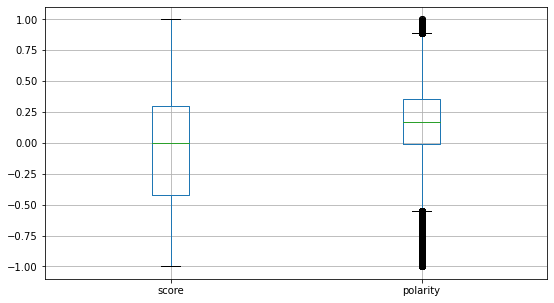

In [89]:
result = pd.merge(df_vader, df_senticnet, on="tweet_id")
boxplot = result.boxplot(column=['score', 'polarity'], grid=True, figsize=(9, 5))

No item anterior, que exibe o *bloxplot* dos *scores* retornados por ambas as ferramentas, percebe-se que **os resultados obtidos com o VADER apresentam-se melhor distribuídos do que os resultados provenientes da utilização do SenticNet**. Este concentra a maioria dos resultados com *scores* positivos.

Nos resultados também foram vistos que o **quantitativo de registros válidos após as análises com o SenticNet foram bem inferior à quantidade de registros analisados pelo VADER** (cerca de 1/3 dos resultados deste último).

Pelos dados expostos acima, e também pela característica do *VADER* de considerar elementos de linguagem informal, amplamente utilizados nas redes sociais, como repetição de pontuações e *emoticons*, por exemplo, escolhemos este modelo como o **analisador de sentimento a ter os resultados considerados neste trabalho**.

***
**Resumo**

Este *notebook* abordou as duas ferramentas de análise de sentimentos experimentadas neste trabalho, o **VADER** e o **SenticNET** apresentando suas principais características e exemplos de utilização.

Ambas as ferramentas foram utilizadas para o **procedimento de análises de sentimentos dos *tweets* selecionados na etapa anterior**.

Por fim, foi realizada uma comparação entre os *scores* de sentimentos de ambas por meio de quantitativos e métricas estatísticas, balizando, juntamente com outros fatores, a **escolha pelo VADER** como a ferramenta a ser utilizada para as análises a serem realizadas neste trabalho.

***
**Fontes**

(1) VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text

(2) SenticNet 6: Ensemble Application of Symbolic and Subsymbolic AI for Sentiment Analysis

(3) Free Google Translator API for Pyhton - https://pypi.org/project/googletrans/

(4) SenticNet Pyhton Package - https://pypi.org/project/senticnet/

(5) Spacy - https://spacy.io/